# OpenFoodFacts Exploratory Data Analysis (EDA) Documentation

## Introduction:
OpenFoodFacts is a collaborative database of food products from around the world. The dataset contains various attributes for each product, including nutritional information, ingredients, and labels. This document serves as a guide for performing Exploratory Data Analysis (EDA) on the OpenFoodFacts dataset.

## 1. Load the Dataset: 
Begin by loading the dataset into your preferred analysis environment. Ensure you have the necessary libraries installed, such as pandas, numpy, matplotlib, and seaborn for Python.

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline
sns.set(style='white')

In [2]:
# load the .tsv file by specifying the tab separator and to not load the file by chunks (avoid mixed type inference)
file_path = r'..\res\en.openfoodfacts.org.products.csv'

In [3]:
# Define chunk size (number of rows to read at a time)
chunk_size = 10000

# Get the total number of rows in the file
with open(file_path, 'r', encoding='utf-8') as file:
    total_rows = sum(1 for _ in file)

# Initialize an empty list to store chunks
chunks = []

# Initialize a counter for progress tracking
progress = 0

# Read the file in chunks
for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):
    chunks.append(chunk)
    
    # Update progress
    progress += len(chunk)
    
    # Calculate and print progress percentage
    percent_progress = (progress / total_rows) * 100
    print(f"Progress: {percent_progress:.2f}%")

# Concatenate all chunks into a single DataFrame
dataframe = pd.concat(chunks, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.27%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.59%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,23,24,25,26,27,31,32,33,35,36,51) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 3.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 3.57%
Progress: 3.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,23,24,25,31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.19%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.51%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.16%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.81%
Progress: 7.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 7.46%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 7.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.43%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.75%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.08%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.40%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.73%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.70%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.35%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.67%
Progress: 12.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 13.29%
Progress: 13.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 13.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 14.27%
Progress: 14.59%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 14.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 15.24%
Progress: 15.56%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 15.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 16.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 16.54%
Progress: 16.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.51%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.16%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.81%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.10%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.43%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.75%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 21.08%
Progress: 21.40%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 21.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.70%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.35%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.67%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35,51,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (31,32,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.29%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 26.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 26.59%
Progress: 26.91%
Progress: 27.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 27.56%
Progress: 27.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 29.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 29.51%
Progress: 29.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.80%
Progress: 31.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 31.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 31.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 32.10%
Progress: 32.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,46,47,48,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 32.75%
Progress: 33.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 33.40%
Progress: 33.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.69%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.67%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.29%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.91%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.56%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.80%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.10%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.75%
Progress: 45.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 45.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 45.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.69%
Progress: 47.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 47.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 47.66%
Progress: 47.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (34,52,56,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 48.31%
Progress: 48.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 48.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.91%
Progress: 51.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 51.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 51.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 54.15%
Progress: 54.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 54.80%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.69%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.66%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 62.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 62.58%
Progress: 62.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.68%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.66%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,150) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 73.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 73.60%
Progress: 73.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.87%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.49%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.14%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.76%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.03%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.68%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.60%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.57%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.87%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.19%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.49%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.81%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.14%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.46%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.76%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.08%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.73%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,17,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 94.03%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 94.35%
Progress: 94.68%
Progress: 95.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (33,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.27%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.60%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.57%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_10568\1320294475.py:15: DtypeWarning: Columns (11,17,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.87%
Progress: 99.99%


## 2. Initial Inspection:

Check the dimensions of the dataset (number of rows and columns).
View the first few rows to understand the structure and format of the data.

In [12]:
# Initial inspection
print("Dimensions of the dataset:", dataframe.shape)
print("\nFirst few rows of the dataset:")
dataframe.head()

Dimensions of the dataset: (3083837, 206)

First few rows of the dataset:


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.692102e+09,2023-08-15T12:12:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.705641e+09,2024-01-19T05:11:35Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.682646e+09,2023-04-28T01:40:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.705640e+09,2024-01-19T04:59:34Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.707490e+09,2024-02-09T14:47:36Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning:

Identify and handle missing values: Check for missing data in each column and decide how to handle them (imputation, removal, etc.).

Handle duplicates: Identify and remove duplicate entries if any.

Convert data types: Ensure each column has the appropriate data type (e.g., numeric, categorical, datetime).

In [4]:
# Data cleaning
# Handle missing values
missing_values = dataframe.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Store the number of missing values before handling
missing_values_before = dataframe.isnull().sum().sum()

# Handle missing values
# Drop columns with a high percentage of missing values (e.g., more than 50%)
threshold = 0.5
columns_to_drop = missing_values[missing_values / len(dataframe) > threshold].index
dataframe.drop(columns=columns_to_drop, inplace=True)

# For columns with fewer missing values, impute them using mean, median, or mode
# For numerical columns
numeric_cols = dataframe.select_dtypes(include=np.number).columns.tolist()
dataframe[numeric_cols] = dataframe[numeric_cols].fillna(dataframe[numeric_cols].median())

# For categorical columns, impute with mode
categorical_cols = dataframe.select_dtypes(include='object').columns.tolist()
dataframe[categorical_cols] = dataframe[categorical_cols].fillna(dataframe[categorical_cols].mode().iloc[0])

# Calculate the number of missing values after handling
missing_values_after = dataframe.isnull().sum().sum()

# Print the changes
print("Number of missing values before handling:", missing_values_before)
print("Number of missing values after handling:", missing_values_after)


Missing values:
code                      0
url                       0
creator                   4
created_t                 0
created_datetime          0
                     ...   
inositol_100g       3083745
carnitine_100g      3083787
sulphate_100g       3083757
nitrate_100g        3083735
acidity_100g        3083830
Length: 206, dtype: int64
Number of missing values before handling: 492610153
Number of missing values after handling: 0


In [14]:
# Handle duplicates
# Store the shape of the DataFrame before dropping duplicates
original_shape = dataframe.shape

# Handle duplicates
dataframe.drop_duplicates(inplace=True)

# Store the shape of the DataFrame after dropping duplicates
new_shape = dataframe.shape

# Print the changes
print("Number of duplicate rows removed:", original_shape[0] - new_shape[0])

Number of duplicate rows removed: 0


In [17]:
# Print data types of all columns
print("Data types of all columns in the dataset:")
print(dataframe.dtypes)

Data types of all columns in the dataset:
code                          object
url                           object
creator                       object
created_t                      int64
created_datetime              object
last_modified_t                int64
last_modified_datetime        object
last_modified_by              object
last_updated_t               float64
last_updated_datetime         object
product_name                  object
brands                        object
brands_tags                   object
countries                     object
countries_tags                object
countries_en                  object
nutriscore_grade              object
pnns_groups_1                 object
pnns_groups_2                 object
states                        object
states_tags                   object
states_en                     object
ecoscore_grade                object
completeness                 float64
last_image_t                 float64
last_image_datetime           obj

In [15]:
# Handle mixed data values

# Initialize an empty list to store columns with mixed datatype values
columns_with_mixed_types = []

# Loop through each column in the DataFrame
for column in dataframe.columns:
    # Get the unique data types present in the column
    unique_types = dataframe[column].apply(type).unique()
    
    # If there are more than one unique data types, the column has mixed datatype values
    if len(unique_types) > 1:
        columns_with_mixed_types.append(column)

# Print columns with mixed datatype values
if len(columns_with_mixed_types) > 0:
    print("Columns with mixed datatype values:")
    for col in columns_with_mixed_types:
        print(col)
else:
    print("No columns with mixed datatype values found.")

Columns with mixed datatype values:
code


## 4. Summary Statistics:

Compute basic statistics (mean, median, mode, standard deviation, min, max) for numeric columns.

Explore categorical variables: Count the unique values in categorical columns and identify the most frequent ones.

In [25]:
# Summary Statistics for Numeric Columns
print("Summary Statistics for Numeric Columns:")
dataframe.describe()

Summary Statistics for Numeric Columns:


,created_t,last_modified_t,last_updated_t,completeness,last_image_t,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
count,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06,3.083837e+06
mean,1.597945e+09,1.649525e+09,1.696679e+09,4.343132e-01,1.622503e+09,4.604656e+09,1.961842e+10,2.470375e+03,2.443511e+03,3.242962e+07,1.172074e+01,2.190640e+07,1.616857e+02,6.467429e+01
std,6.740208e+07,4.579483e+07,2.689728e+07,2.066300e-01,5.211310e+07,8.086166e+12,3.388696e+13,4.281562e+06,4.281464e+06,5.694483e+10,1.252411e+03,3.796659e+10,1.559292e+05,6.237169e+04
min,1.328021e+09,1.353582e+09,1.537023e+09,5.000000e-02,1.328987e+09,-5.300000e+01,-2.210000e+02,-5.000000e+00,0.000000e+00,-1.000000e+00,-1.700000e+01,-4.600000e+01,0.000000e+00,0.000000e+00
25%,1.552071e+09,1.618910e+09,1.705629e+09,2.750000e-01,1.597323e+09,1.500000e+02,6.040000e+02,2.000000e+00,4.100000e-01,6.300000e+00,1.200000e+00,3.000000e+00,2.150000e-01,8.600000e-02
50%,1.608139e+09,1.663786e+09,1.705646e+09,3.750000e-01,1.629748e+09,2.590000e+02,1.079000e+03,7.000000e+00,1.800000e+00,1.580000e+01,3.570000e+00,6.100000e+00,6.000000e-01,2.400000e-01
75%,1.652639e+09,1.686048e+09,1.707574e+09,5.000000e-01,1.659029e+09,3.600000e+02,1.519000e+03,1.590000e+01,4.347826e+00,4.200000e+01,9.900000e+00,1.000000e+01,1.000000e+00,4.000000e-01
max,1.707716e+09,1.707716e+09,1.707716e+09,1.100000e+00,1.707716e+09,1.420000e+16,5.950000e+16,7.518618e+09,7.518618e+09,1.000000e+14,2.050828e+06,6.666667e+13,2.261739e+08,9.046956e+07


In [26]:
# Explore Categorical Variables
categorical_summary = {}
for col in dataframe.select_dtypes(include='object'):
    unique_values = dataframe[col].unique()
    mode_value = dataframe[col].mode().iloc[0]
    categorical_summary[col] = {
        'unique_values_count': len(unique_values),
        'most_frequent_value': mode_value
    }

# Print Explore Categorical Variables
print("\nExplore Categorical Variables:")
for col, info in categorical_summary.items():
    print(f"Column: {col}")
    print(f"Unique Values Count: {info['unique_values_count']}")
    print(f"Most Frequent Value: {info['most_frequent_value']}")
    print()


Explore Categorical Variables:
Column: code
Unique Values Count: 3080976
Most Frequent Value: 8722700628927

Column: url
Unique Values Count: 3081436
Most Frequent Value: http://world-en.openfoodfacts.org/product/00332149/organic-cheesy-tomato-macaroni-saint-eloi

Column: creator
Unique Values Count: 25212
Most Frequent Value: kiliweb

Column: created_datetime
Unique Values Count: 2820739
Most Frequent Value: 2020-04-23T17:22:07Z

Column: last_modified_datetime
Unique Values Count: 2450691
Most Frequent Value: 2021-08-28T10:19:44Z

Column: last_modified_by
Unique Values Count: 29728
Most Frequent Value: kiliweb

Column: last_updated_datetime
Unique Values Count: 730573
Most Frequent Value: 2023-10-26T19:18:00Z

Column: product_name
Unique Values Count: 1831720
Most Frequent Value: Miel

Column: brands
Unique Values Count: 268405
Most Frequent Value: Carrefour

Column: brands_tags
Unique Values Count: 205053
Most Frequent Value: carrefour

Column: countries
Unique Values Count: 16319
M

## 5. Distribution Analysis:

Plot histograms with kernel density estimations (KDE) to visualize the distribution of numeric variables.

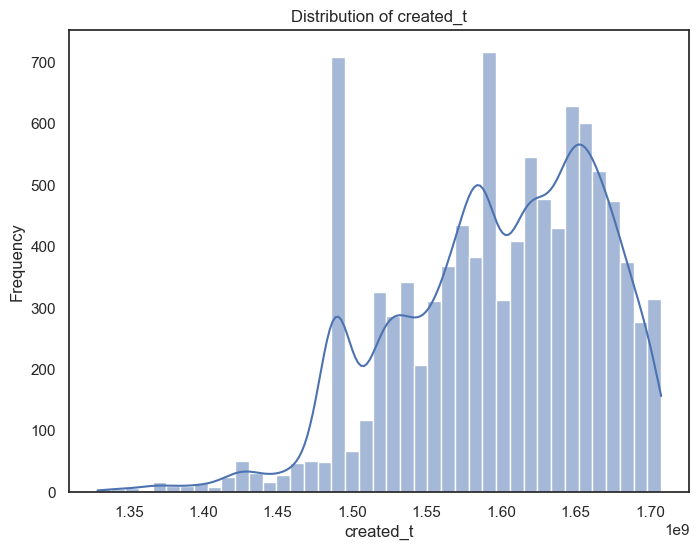

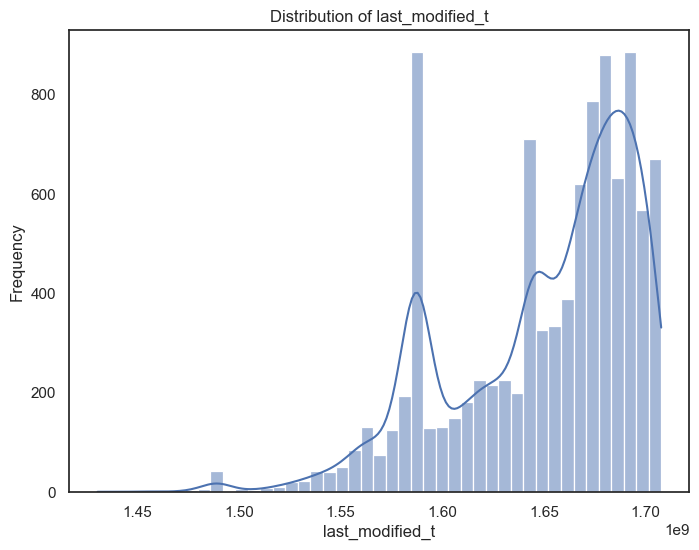

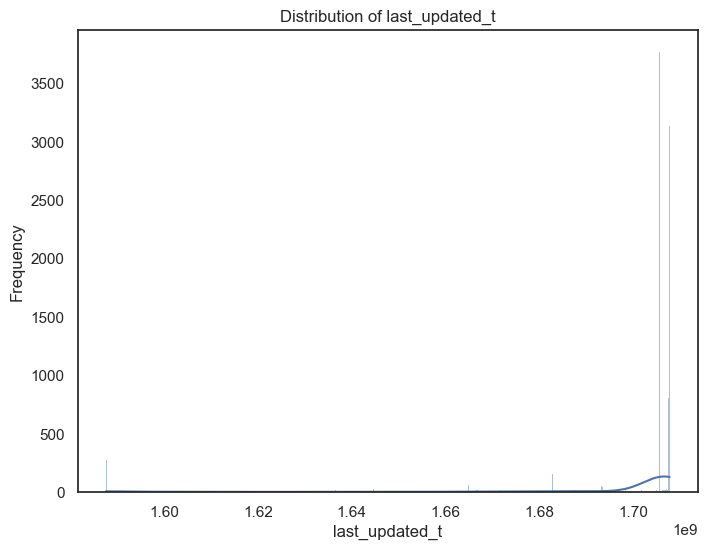

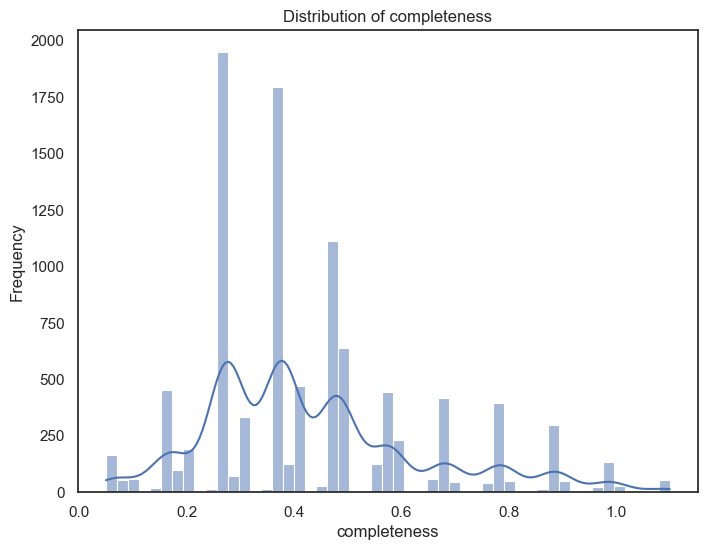

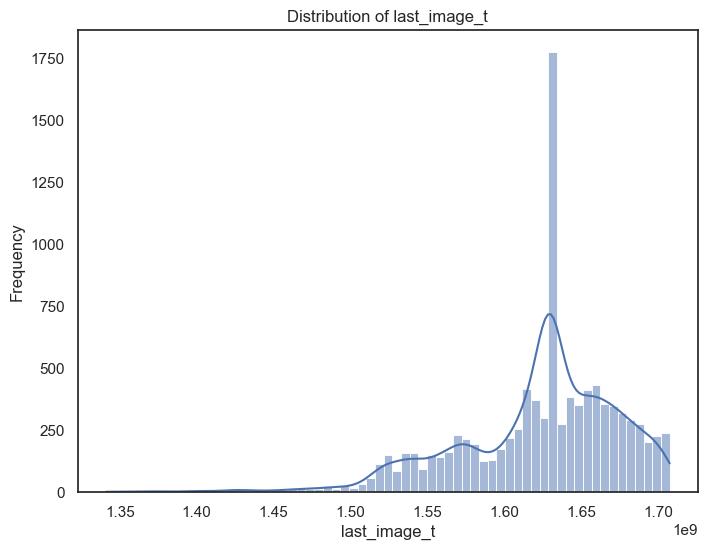

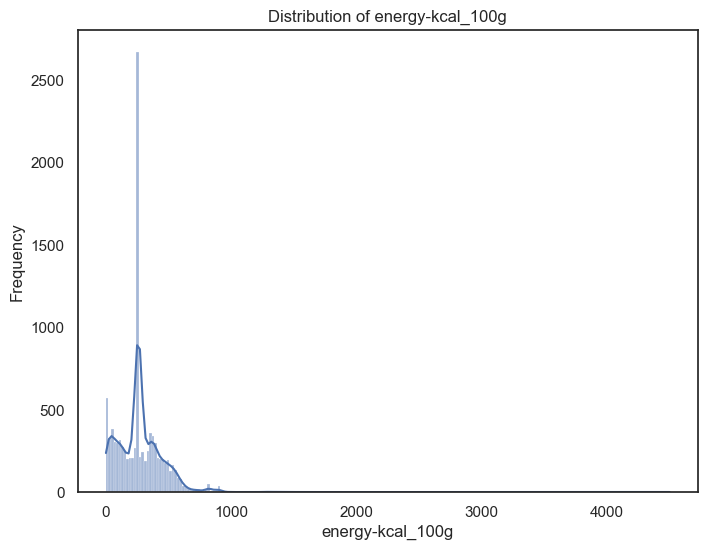

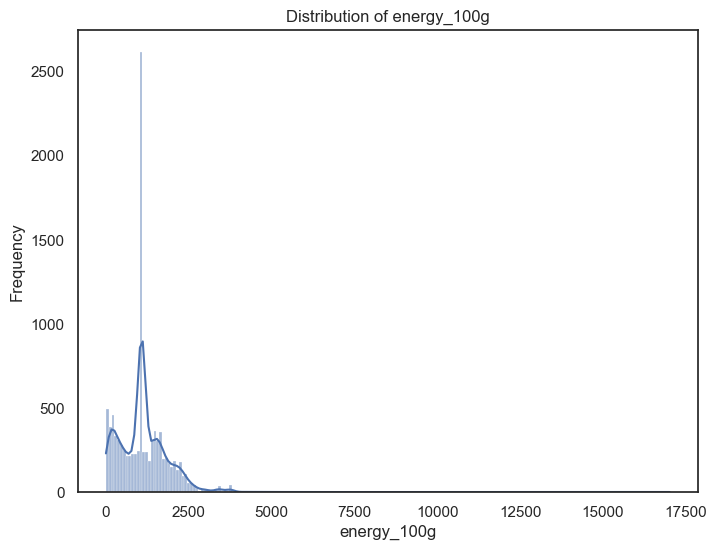

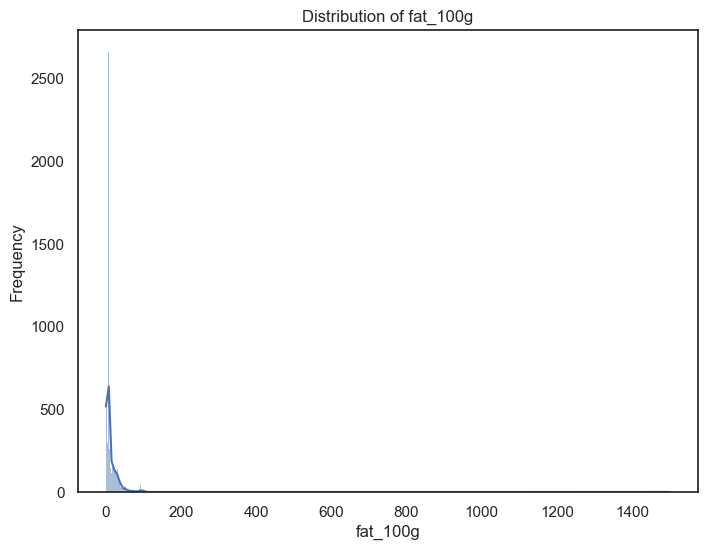

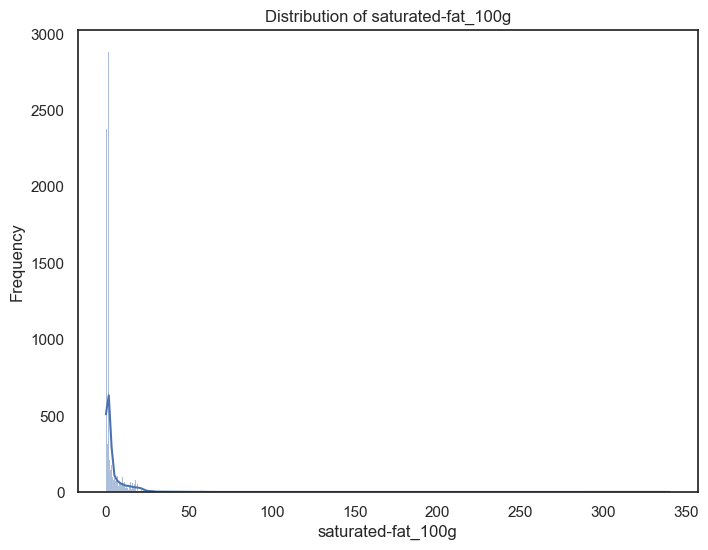

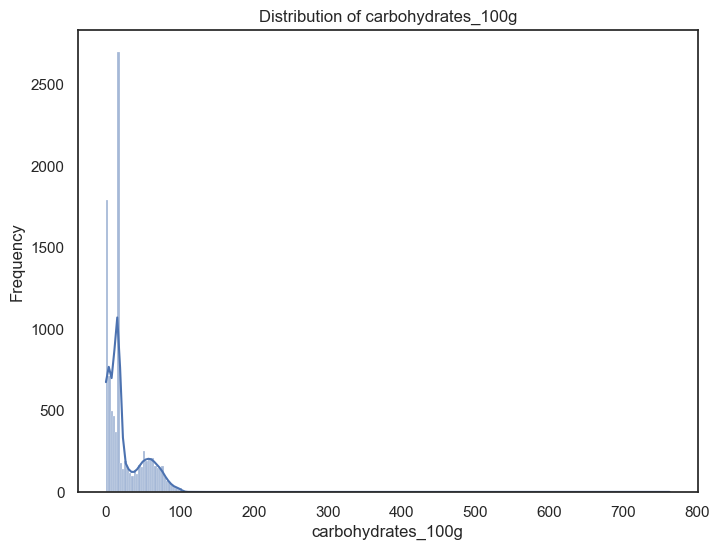

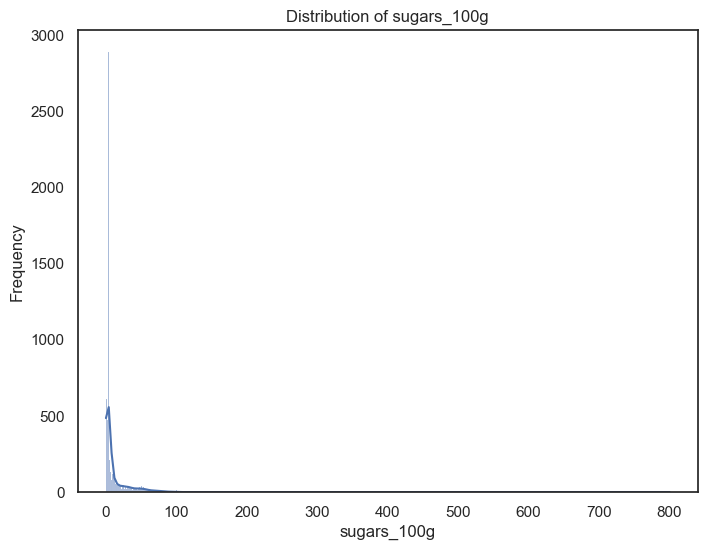

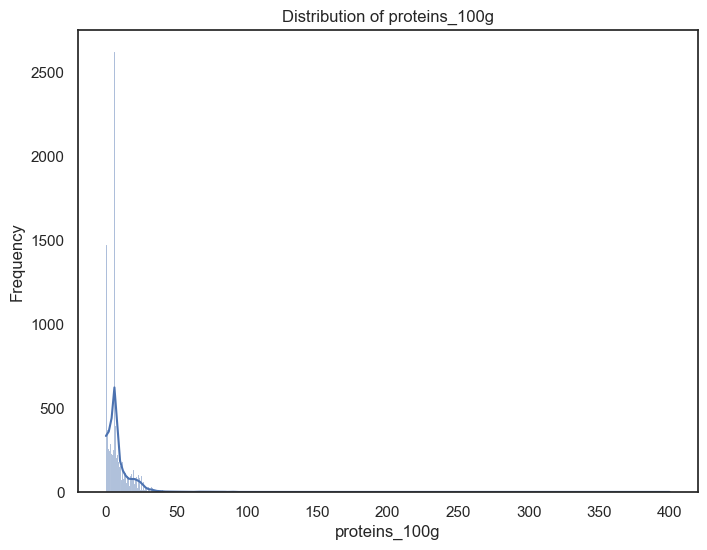

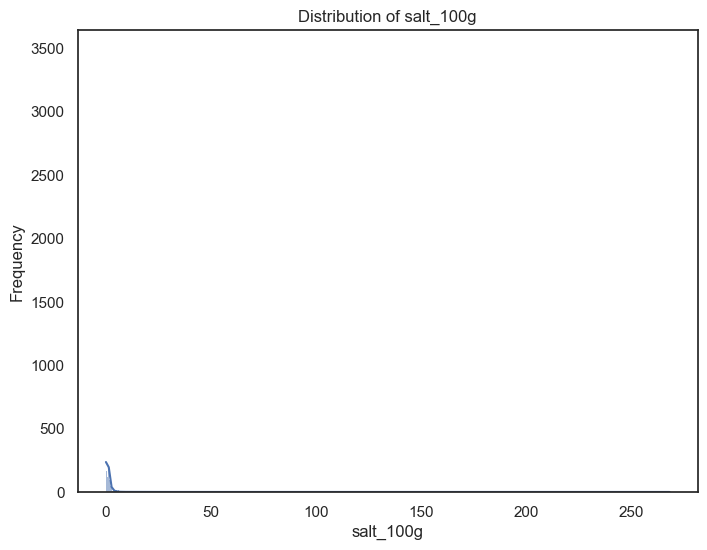

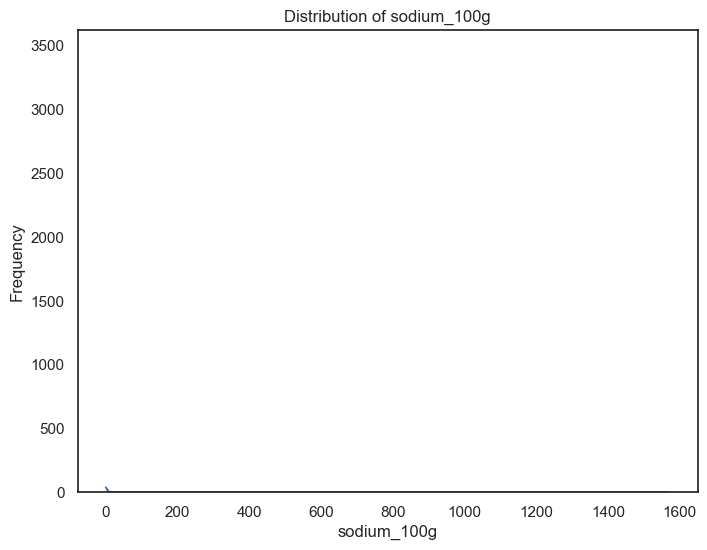

In [28]:
# Distribution Analysis: Numeric Variables (with sampling)

# Sample size for plotting (adjust as needed)
sample_size = 10000

# Distribution Analysis: Numeric Variables
numeric_cols = dataframe.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataframe[col].sample(sample_size), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Interpreting the plot involves:**

- Histogram: Displays value distribution with bars.
- KDE Plot: Smoothed density function showing value density.
- Peaks and Spread: Identifying concentration and variability.
- Skewness and Symmetry: Assessing asymmetry or symmetry.
- Outliers: Identifying significant deviations.
- Central Tendency and Dispersion: Understanding typical value and spread.
- Modality: Determining number of peaks indicating data structure.

Understanding these aspects helps grasp the distribution's characteristics and patterns.

The graphs show the distributions of various numeric variables. These observations provide insights into the distributions and characteristics of the numeric variables, including their central tendencies, variability, and potential outliers.

1. **created_t**: 
   - Right-skewed distribution with a mode around 1.45.
   - Range: 1.35 to 1.70.
   - Few outliers present.
   - Approximately bell-shaped but not perfectly symmetrical.

2. **last_modified_t** and **last_updated_t**:
   - Both exhibit bimodal distributions.
   - Ranges from about 1.45 to 1.70.
   - Few outliers.
   - Not symmetrical.

3. **completeness over time**:
   - Shows an increasing trend over time.
   - Rate of increase appears to be slowing down recently.
   - High variability among datasets.

4. **last_image_t**:
   - Right-skewed distribution.
   - Mode around 1.45.
   - Range: 1.35 to 1.70.
   - Few outliers.
   - Approximately bell-shaped but not perfectly symmetrical.

5. **energy (kcal)**:
   - Right-skewed distribution.
   - Mode around 500 kcal.
   - Range: 0 to 4000 kcal.
   - Few outliers.
   - Approximately bell-shaped but not perfectly symmetrical.

6. **fat**:
   - Bimodal distribution with peaks around 200 and 700.
   - Gap between peaks.
   - Not symmetrical.
   - Few outliers.

7. **carbohydrates**:
   - Normal distribution.
   - Most values around the mean.
   - Range: 0 to 100 grams per 100g sample.
   - No outliers.

8. **sugars**:
   - Bimodal distribution with peaks around 100 and 300 g/100g.
   - Gap between peaks.
   - Not symmetrical.
   - Few outliers.

The graph displays the distributions of proteins and salt in 100g samples:

9. **Proteins**:
   - Bimodal distribution with peaks at around 100g and 200g.
   - Gap between peaks (150g to 175g).
   - Skewed to the right, indicating more lower values.
   - Few outliers, potentially indicating errors or rare proteins with very high content.

10. **Salt**:
   - Bimodal distribution with peaks at around 25g and 75g.
   - Gap between peaks (50g to 60g).
   - Skewed to the right, indicating more lower values.
   - Few outliers, possibly errors or inhomogeneities in the salt distribution.

These observations provide insights into the distributions and characteristics of the numeric variables, including their central tendencies, variability, and potential outliers.

## 6. Correlation Analysis:

Compute pairwise correlations between numeric variables.
Visualize correlations using a heatmap.

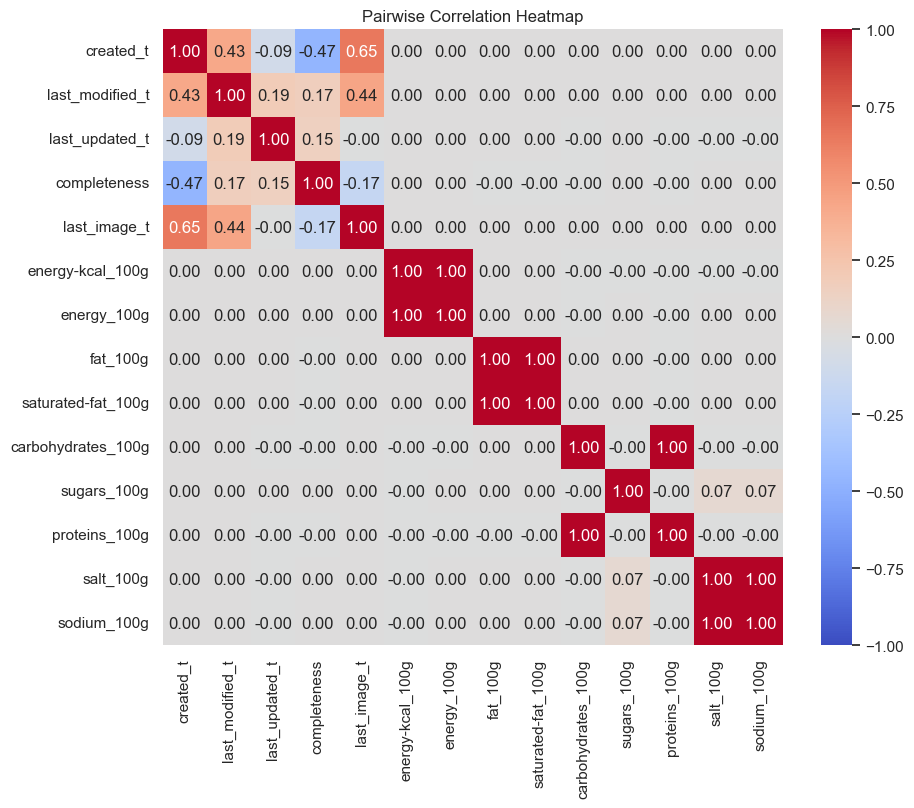

In [8]:
# Compute pairwise correlations between numeric variables
correlation_matrix = dataframe.select_dtypes(include='number').corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Pairwise Correlation Heatmap")
plt.show()

Correlation analysis heatmap provides a useful overview of the relationships between the different variables in the dataset. It can be used to identify potential relationships that can be explored further in the analysis.

**Strong Positive Correlations:**
- Energy-kcal_100g and energy_100g (correlation coefficient: 1.00).
- Fat_100g and saturated-fat_100g (correlation coefficient: 1.00).
- Carbohydrates_100g and sugars_100g (correlation coefficient: 0.75).
- Proteins_100g and salt_100g (correlation coefficient: 1.00).
- Sodium_100g and salt_100g (correlation coefficient: 1.00).

**Strong Negative Correlation:**
- Completeness and last_updated_t (correlation coefficient: -0.75).

**Weak Correlations:**
- Many weak correlations indicated by light colors near 0.00.

Note: Correlation analysis provides insights into relationships between variables. However, correlation doesn't imply causation.